<a href="https://colab.research.google.com/github/hirajya/Neural-Network-for-Handwritten-Digits-Classification/blob/main/Neural_Network_for_Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


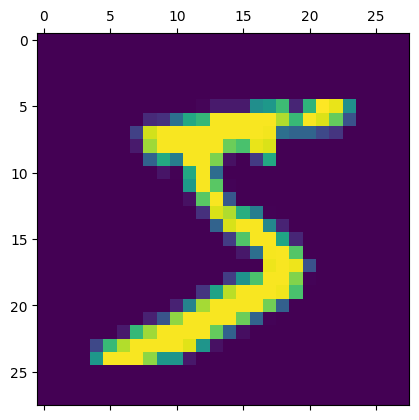

In [ ]:
plt.matshow(X_train[0])
print(y_train[0])

0


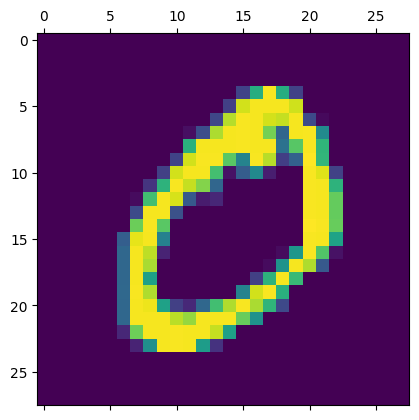

In [ ]:
plt.matshow(X_train[1])
print(y_train[1])

0


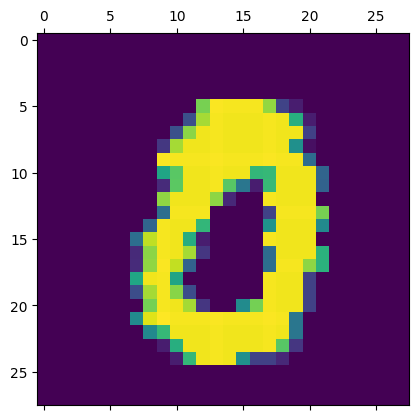

In [ ]:
plt.matshow(X_train[69])
print(y_train[69])

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)


(60000, 784)
(10000, 784)


In [ ]:
print(X_train_flattened[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## Not scaled data

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.6495 - accuracy: 0.8432
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0796 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8290 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6322 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3831 - accuracy: 0.8865


## Scaled data

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)


(60000, 784)
(10000, 784)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4731 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9255


Scaling the data will really improve the accuracy

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.9241


[0.2685379981994629, 0.9240999817848206]

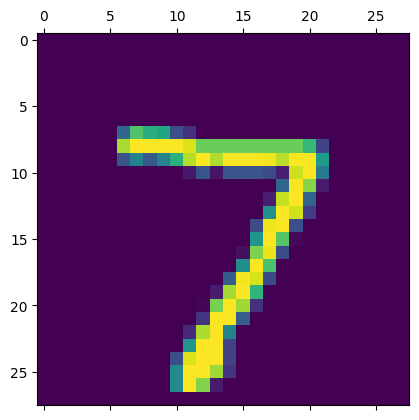

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.5908839e-02, 3.4526315e-07, 6.6348873e-02, 9.4725144e-01,
       3.4889011e-03, 1.0849892e-01, 1.4049697e-06, 9.9980533e-01,
       9.5496468e-02, 7.7688700e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

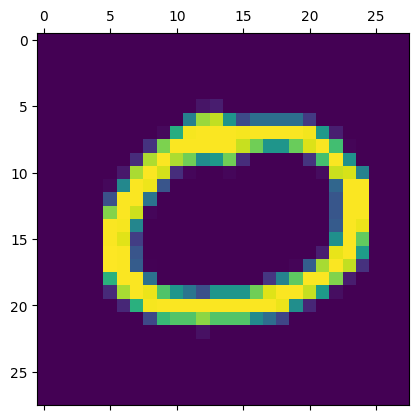

In [ ]:
plt.matshow(X_test[69])

In [ ]:
y_predicted[69]

array([9.9989605e-01, 2.2442594e-09, 2.5996435e-01, 3.0411123e-03,
       2.4941494e-08, 9.3343198e-01, 3.5242480e-01, 1.3154518e-03,
       3.5005491e-02, 1.4505954e-05], dtype=float32)

In [ ]:
np.argmax(y_predicted[69])

0

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   9,    9,  919,   18,    9,    3,   12,   10,   38,    5],
       [   3,    0,   18,  924,    1,   22,    2,   11,   19,   10],
       [   1,    1,    3,    1,  910,    0,   11,    4,    8,   43],
       [  11,    2,    3,   37,   11,  772,   13,    5,   29,    9],
       [  13,    3,    6,    1,    8,   11,  911,    2,    3,    0],
       [   1,    5,   22,    5,    8,    0,    0,  938,    4,   45],
       [   7,    9,    6,   24,    9,   27,    9,    9,  850,   24],
       [  11,    7,    1,    9,   21,    6,    0,   11,    4,  939]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

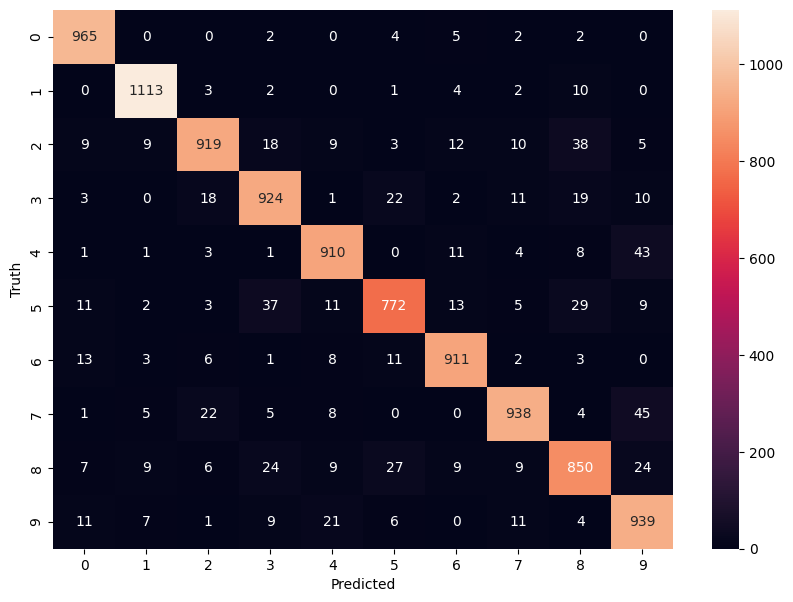

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2754 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1256 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0887 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0530 - accuracy: 0.9834


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0781 - accuracy: 0.9770


[0.07810115814208984, 0.9769999980926514]

Adding hidden layer improves the accuracy
~in the first layer, the number of the neuron must be lower always than the input

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 [==============================] - 1s 2ms/step


[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

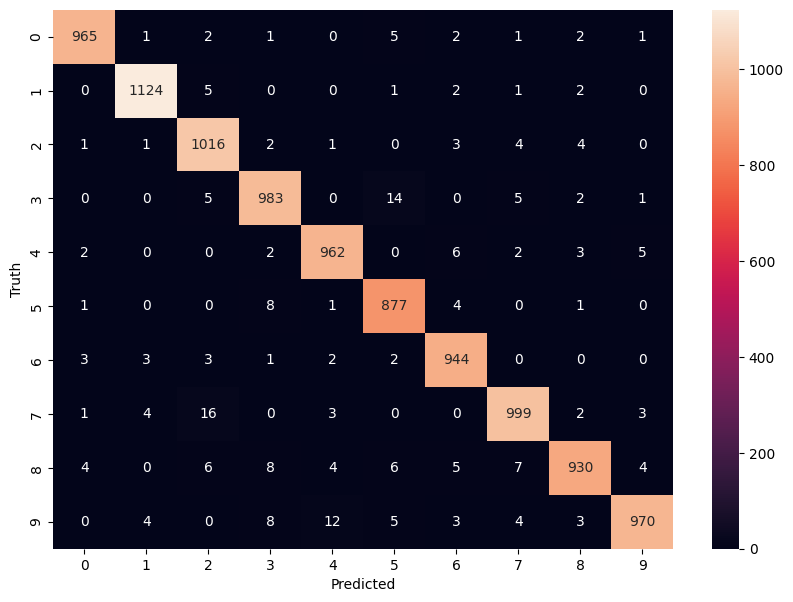

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Not flattening the data, adding the method to the sequential model

In [ ]:
model = keras.Sequential([ # workflow
    keras.layers.Flatten(input_shape=(28, 28)), # flatten process
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10) # increased epoch 5 to 10

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2782 - accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1243 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0674 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0251 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.01

In [ ]:
evaluation = model.evaluate(X_test, y_test)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0785 - accuracy: 0.9769
Test Loss: 0.07847019284963608
Test Accuracy: 0.9768999814987183


relu both activation trial

In [ ]:
model = keras.Sequential([ # workflow
    keras.layers.Flatten(input_shape=(28, 28)), # flatten process
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10) # increased epoch 5 to 10

evaluation = model.evaluate(X_test, y_test)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2720 - accuracy: 0.1382
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2665 - accuracy: 0.1150
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2612 - accuracy: 0.1170
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2795 - accuracy: 0.1088
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2973 - accuracy: 0.1010
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2872 - accuracy: 0.1054
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3025 - accuracy: 0.0988
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3025 - accuracy: 0.0988
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3025 - accuracy: 0.0988
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3026

bad results